In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import seaborn as sns
import sklearn
import numpy as np


from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
sns.set()

pd.options.display.max_columns = 100

### Content:
* [Data exploratory analysis](#first-bullet)
* [First simple baseline model](#second-bullet)
* [Data exploratory analysis](#third-bullet)
* [Testing our model on test dataset](#fourth-bullet)

## Data exploratory analysis <a class="anchor" id="first-bullet"></a>

In [2]:
# reading data set
data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
data_test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [3]:
raw_data = data.copy().drop("Id", axis = 1)
raw_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
raw_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
all_features = raw_data.columns
numeric_features = list(raw_data.describe().columns)
categorical_features = [elem for elem in all_features if elem not in numeric_features]
all_categorical_features = [elem for elem in all_features if elem not in numeric_features]
print ("Numeric features: %d" %len(numeric_features))
print ("Categorical features: %d" %len(categorical_features))

Numeric features: 37
Categorical features: 43


In [7]:
for feature in categorical_features:
    print(feature + "\n")
    print(raw_data[feature].unique())

MSZoning

['RL' 'RM' 'C (all)' 'FV' 'RH']
Street

['Pave' 'Grvl']
Alley

[nan 'Grvl' 'Pave']
LotShape

['Reg' 'IR1' 'IR2' 'IR3']
LandContour

['Lvl' 'Bnk' 'Low' 'HLS']
Utilities

['AllPub' 'NoSeWa']
LotConfig

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope

['Gtl' 'Mod' 'Sev']
Neighborhood

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle

['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st

['Vi

## First simple baseline model  <a class="anchor" id="second-bullet"></a>

In [8]:
# Let's train simple model on some features

y_target = raw_data["SalePrice"]
key_features = raw_data[["MSZoning", "Utilities", "LotArea","OverallQual","HeatingQC","SaleType","SaleCondition"]]

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

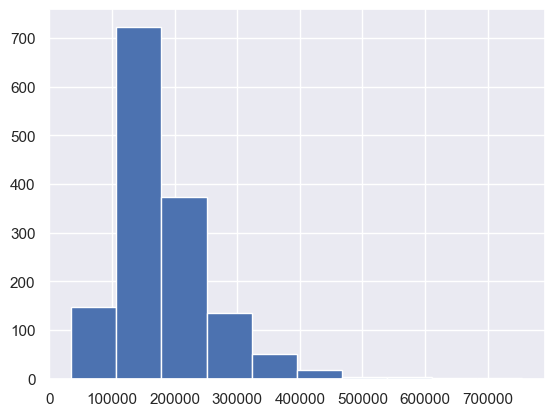

In [9]:
plt.hist(y_target)
y_target.describe()

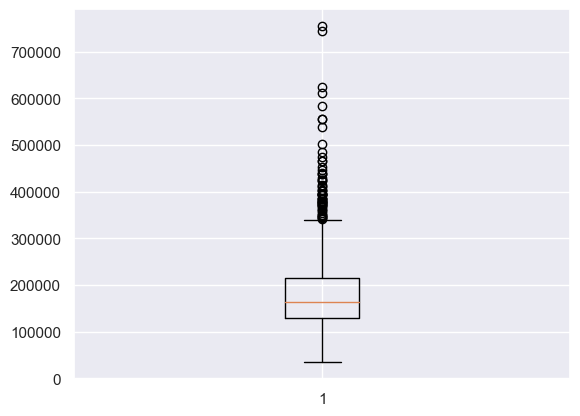

In [10]:
plt.boxplot(y_target)
plt.show()

We see some outliers, let's explore them

In [11]:
quantile_995 = np.quantile(raw_data["SalePrice"],0.995)
quantile_995

527331.9149999974

In [12]:
raw_data[raw_data["SalePrice"] > quantile_995]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
803,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1046,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,Ex,Y,SBrkr,1992,876,0,2868,0,0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3,716,TA,TA,Y,214,108,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
1169,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


We definitly see that the pool matters, adds to the cost of the building

In [13]:
numeric_key_features = list(key_features.describe().columns)
key_features.describe()

,LotArea,OverallQual
count,1460.000000,1460.000000
mean,10516.828082,6.099315
std,9981.264932,1.382997
min,1300.000000,1.000000
25%,7553.500000,5.000000
50%,9478.500000,6.000000
75%,11601.500000,7.000000
max,215245.000000,10.000000


In [14]:
all_coulumns = list(key_features.columns)
all_coulumns

['MSZoning',
 'Utilities',
 'LotArea',
 'OverallQual',
 'HeatingQC',
 'SaleType',
 'SaleCondition']

In [15]:
categorical_key_features = [elem for elem in all_coulumns if elem not in numeric_key_features]
categorical_key_features

['MSZoning', 'Utilities', 'HeatingQC', 'SaleType', 'SaleCondition']

In [16]:
for elem in categorical_key_features:
    print(raw_data[elem].nunique())

5
2
5
9
6


In [17]:
categorical_features = raw_data[categorical_key_features]

### Transforming categorical variables into dummies

In [18]:
categorical_features_dummies = pd.get_dummies(categorical_features, drop_first = True)
categorical_features_dummies.shape

(1460, 22)

### Uniting data

In [19]:
numeric_key_features_data = raw_data[numeric_key_features]

In [20]:
all_data_preprocessed = pd.concat([numeric_key_features_data, categorical_features_dummies], axis = 1)
all_data_preprocessed

,LotArea,OverallQual,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_NoSeWa,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,9600,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,11250,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,9550,7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,14260,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,13175,6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,9042,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,9717,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [21]:
 # MSZoning, Utilities, LotArea, OverallQual, OverallCond, HeatingQC, SaleType, SaleCondition
# target - SalePrice

In [22]:
linear_regression = LinearRegression()

In [23]:
linear_regression.fit(all_data_preprocessed, y_target)

LinearRegression()

In [24]:
linear_regression.score(all_data_preprocessed, y_target)

0.6923420130114387

In [25]:
y_hat = linear_regression.predict(all_data_preprocessed)

In [26]:
np.log(y_hat)

/var/folders/gl/_tyc32gx42v6lvcrydtm5xyc0000gn/T/ipykernel_18835/1612834334.py:1: RuntimeWarning: invalid value encountered in log
  np.log(y_hat)


array([12.31527792, 12.12998169, 12.33147909, ..., 12.31872526,
       11.80606346, 11.8081966 ])

In [27]:
np.isnan(y_hat).sum()

0

In [28]:
np.isnan(y_target).sum()

0

In [29]:
a = np.log(y_target)
b = np.log(y_hat)
a.shape, b.shape

/var/folders/gl/_tyc32gx42v6lvcrydtm5xyc0000gn/T/ipykernel_18835/1814992567.py:2: RuntimeWarning: invalid value encountered in log
  b = np.log(y_hat)


((1460,), (1460,))

In [30]:
nan_array = np.argwhere(np.isnan(b))
for ind in nan_array:
    print(y_hat[ind], y_target[ind])

[-22456.29708984] 375    61000
Name: SalePrice, dtype: int64
[-29946.20169995] 533    39300
Name: SalePrice, dtype: int64
[-21993.98937878] 636    60000
Name: SalePrice, dtype: int64
[-5976.67751806] 916    35311
Name: SalePrice, dtype: int64


Negative values arrised, that is weird, maybe that is related to the fact that we didn't check for multicolliniarity, nevetherless the best decision would be to covert them to 0, or to the min price


In [31]:
y_hat_new = np.where(y_hat <= 0, np.min(np.absolute(y_hat)), y_hat)

In [32]:
a = np.log(y_target)
b = np.log(y_hat_new)
a.shape, b.shape

((1460,), (1460,))

In [33]:
np.max(a), np.max(b)

(13.534473028231162, 13.07751666316493)

In [34]:
np.sqrt(mse(a, b))
# that is the prediction in our competition

0.25860264326735144

Text(0, 0.5, 'y_target')

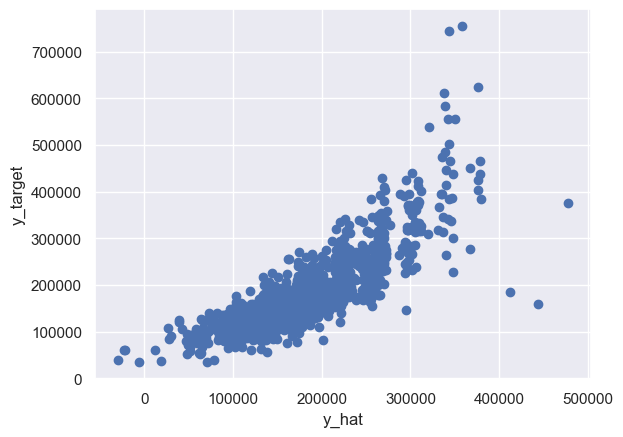

In [35]:
plt.scatter(y_hat, y_target)
plt.xlabel("y_hat")
plt.ylabel("y_target")

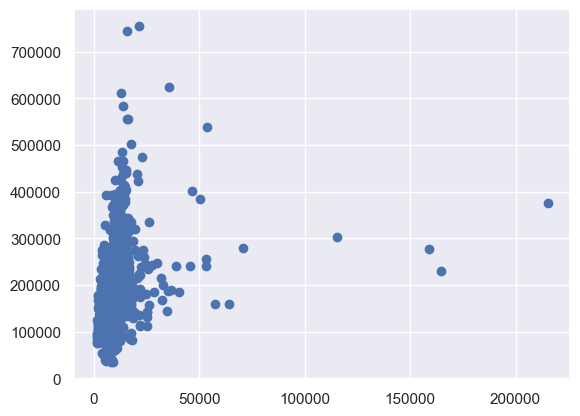

In [36]:
plt.scatter(raw_data["LotArea"], y_target)

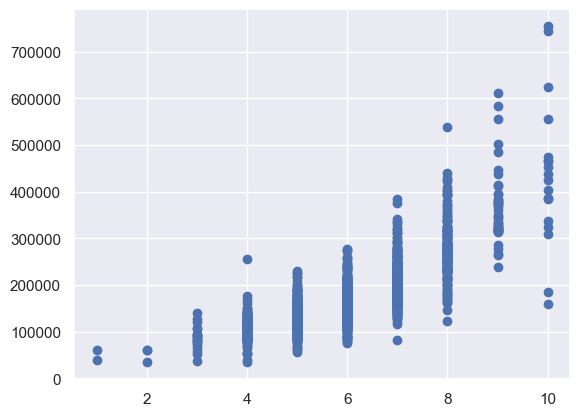

In [37]:
plt.scatter(raw_data["OverallQual"], y_target)

In [38]:
from sklearn.feature_selection import f_regression
f_regression(all_data_preprocessed, y_target)
p_values = f_regression(all_data_preprocessed, y_target)[1]
p_values.round(3)

array([0.   , 0.   , 0.001, 0.012, 0.   , 0.   , 0.585, 0.   , 0.   ,
       0.237, 0.   , 0.455, 0.114, 0.11 , 0.583, 0.294, 0.   , 0.183,
       0.   , 0.053, 0.553, 0.076, 0.   , 0.   ])

In [39]:
reg_summary = pd.DataFrame(data = all_data_preprocessed.columns.values, columns = ["Features"])
reg_summary["Coefficients"] = linear_regression.coef_
reg_summary["p-values"] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,LotArea,1.301273,0.000
1,OverallQual,39228.340258,0.000
2,MSZoning_FV,-11317.777566,0.001
3,MSZoning_RH,3080.378104,0.012
4,MSZoning_RL,12778.861673,0.000
5,MSZoning_RM,-11171.716852,0.000
6,Utilities_NoSeWa,-29814.543262,0.585
7,HeatingQC_Fa,-13165.028136,0.000
8,HeatingQC_Gd,-12207.512092,0.000
9,HeatingQC_Po,-29181.608945,0.237


### Testing our model on test dataset  <a class="anchor" id="second-bullet"></a>

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
data_prep_train, data_prep_test, y_train, y_test = train_test_split(all_data_preprocessed, y_target, test_size=0.2, random_state=42)

In [42]:
reg = LinearRegression()
reg.fit(data_prep_train, y_train)

LinearRegression()

In [43]:
y_hat = reg.predict(data_prep_train) 

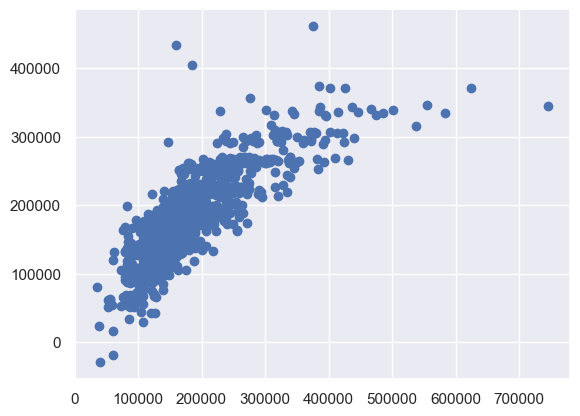

In [44]:
plt.scatter(y_train, y_hat)

/Users/tatiana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

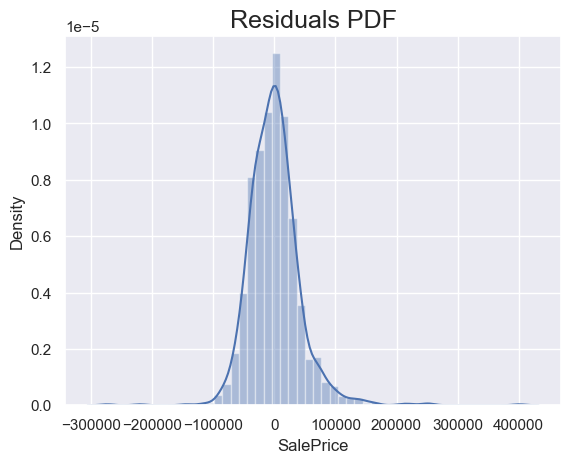

In [45]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size = 18) # estimates of the error

In [46]:
reg.score(data_prep_train, y_train)

0.6890980839386708

In [47]:
reg_summary = pd.DataFrame(data_prep_test.columns.values, columns = ["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,LotArea,1.228303
1,OverallQual,38237.972670
2,MSZoning_FV,-12776.688872
3,MSZoning_RH,3639.840234
4,MSZoning_RL,10045.050126
5,MSZoning_RM,-13125.271153
6,Utilities_NoSeWa,-27400.794484
7,HeatingQC_Fa,-17651.198430
8,HeatingQC_Gd,-13372.302523
9,HeatingQC_Po,-31422.588953


In [48]:
y_hat_test = reg.predict(data_prep_test)

In [49]:
reg.score(data_prep_test, y_test)

0.6933069084903589

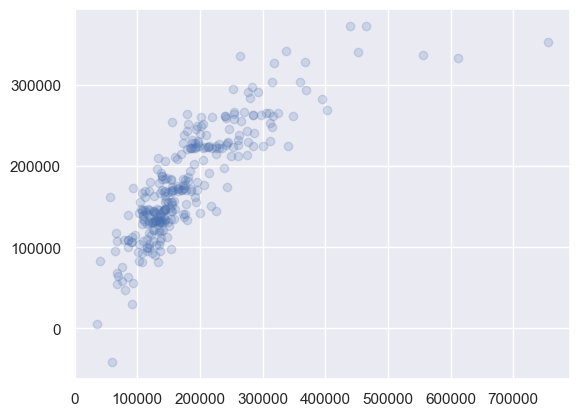

In [50]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.show()

In [51]:
df_pf = pd.DataFrame(y_hat_test, columns = ['Predictions'])
df_pf["Target"] = y_test.reset_index(drop = True)
df_pf

,Predictions,Target
0,169062.260906,154500
1,265219.391461,325000
2,109914.364482,115000
3,156660.561622,159000
4,304245.934360,315500
...,...,...
287,106794.400184,89471
288,231774.255296,260000
289,221998.195392,189000
290,93409.278267,108000


In [52]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions'] 
df_pf['Differnce%'] = np.absolute(df_pf['Residual']*100/df_pf['Target'])
df_pf

,Predictions,Target,Residual,Differnce%
0,169062.260906,154500,-14562.260906,9.425412
1,265219.391461,325000,59780.608539,18.394033
2,109914.364482,115000,5085.635518,4.422292
3,156660.561622,159000,2339.438378,1.471345
4,304245.934360,315500,11254.065640,3.567057
...,...,...,...,...
287,106794.400184,89471,-17323.400184,19.362028
288,231774.255296,260000,28225.744704,10.856056
289,221998.195392,189000,-32998.195392,17.459363
290,93409.278267,108000,14590.721733,13.509928


In [53]:
df_pf.describe()

,Predictions,Target,Residual,Differnce%
count,292.000000,292.000000,292.000000,292.000000
mean,177164.908579,178839.811644,1674.903065,18.655341
std,66416.607239,87730.751259,48556.205469,20.976723
min,-41554.487317,35311.000000,-105587.923181,0.042701
25%,132678.103842,127000.000000,-25438.276057,5.164976
50%,168728.937194,154150.000000,-2522.917024,14.139728
75%,224683.264741,209175.000000,19654.883234,24.794526
max,372876.297456,755000.000000,401907.243945,188.573435


### Cross validation

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
cv = cross_val_score(reg,data_prep_train,y_train,cv=5)

In [56]:
print('Linear regression score :',cv)

Linear regression score : [0.63073713 0.68804898 0.67589382 0.69077244 0.6765033 ]


### Tuning model

In [57]:


## adding more features

In [58]:
cv

array([0.63073713, 0.68804898, 0.67589382, 0.69077244, 0.6765033 ])

Let't take all the numeric features and plot correlation maps to avoid multicollinearity

In [59]:
numeric_features_data = raw_data[numeric_features]

In [60]:
numeric_features_data.shape

(1460, 37)

Let's understand which features are correlated with target

In [61]:
numeric_features_data.corrwith(y_target).sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
dtype: float64

Some features are not much correlated, although they could be useful if we tranform them into binary variables,
like has pool or not 
Some features may be correlated (like year built and year mod) and garage area and cars, living area and lot area, and it is not very good for linear regression.

In [62]:
numeric_features_data[["YearBuilt", "YearRemodAdd"]].corr()

,YearBuilt,YearRemodAdd
YearBuilt,1.000000,0.592855
YearRemodAdd,0.592855,1.000000


In [63]:
numeric_features_data[["GarageArea", "GarageCars"]].corr()

,GarageArea,GarageCars
GarageArea,1.000000,0.882475
GarageCars,0.882475,1.000000


In [64]:
selected_features_data = numeric_features_data[
    ["OverallQual","GarageArea", "GarageCars", "FullBath", "1stFlrSF", "TotalBsmtSF", "GrLivArea"]
]

In [65]:
corr = selected_features_data.corr()
#corr.style.background_gradient(cmap='coolwarm')

<AxesSubplot:>

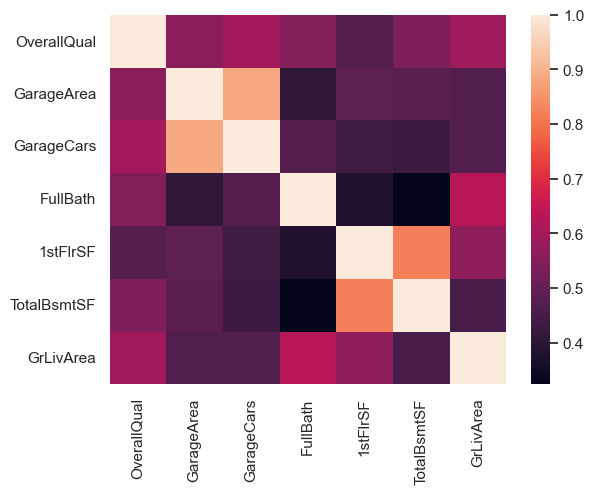

In [66]:
sns.heatmap(corr)

We see highly correlated features GarageArea and 1s and Total, so we choose to not to include both in the regression

In [67]:
#The second way is to find VIF,  Variance inflation facto 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = selected_features_data.columns
vif["vif_Factor"] = [variance_inflation_factor(selected_features_data.values, i) for i in range(selected_features_data.shape[1])]
vif


,features,vif_Factor
0,OverallQual,27.666814
1,GarageArea,28.889095
2,GarageCars,33.403853
3,FullBath,16.904480
4,1stFlrSF,32.913041
5,TotalBsmtSF,22.466353
6,GrLivArea,21.376954


In [68]:
# We will drop values which are to much correlated, and find the new VIF values
new_features_data = selected_features_data.drop(["GarageArea","1stFlrSF"], axis = 1)
new_features_data

,OverallQual,GarageCars,FullBath,TotalBsmtSF,GrLivArea
0,7,2,2,856,1710
1,6,2,2,1262,1262
2,7,2,2,920,1786
3,7,3,1,756,1717
4,8,3,2,1145,2198
...,...,...,...,...,...
1455,6,2,2,953,1647
1456,6,2,2,1542,2073
1457,7,1,2,1152,2340
1458,5,1,1,1078,1078


In [69]:
np.set_printoptions(precision=2)
vif = pd.DataFrame()
vif["features"] = new_features_data.columns
vif["vif_Factor"] = [variance_inflation_factor(new_features_data.values, i) for i in range(new_features_data.shape[1])]
vif


,features,vif_Factor
0,OverallQual,27.490050
1,GarageCars,10.985122
2,FullBath,16.668657
3,TotalBsmtSF,10.237815
4,GrLivArea,18.898231


The values are better, but not perfect.
Other way to deal with correlated variables is to transform them in a way, they are less correlated with others, but still contain useful information

Let's take all the features and see what VIF is for them

In [70]:
numeric_features_data = numeric_features_data.drop("SalePrice", axis = 1)

Let's find out are there any missing values

In [71]:
features_names = numeric_features_data.columns

In [72]:
numeric_features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

(array([  6.,  28.,  49.,  52.,  93., 195., 194., 140., 190., 432.]),
 array([1900., 1911., 1922., 1933., 1944., 1955., 1966., 1977., 1988.,
        1999., 2010.]),
 <BarContainer object of 10 artists>)

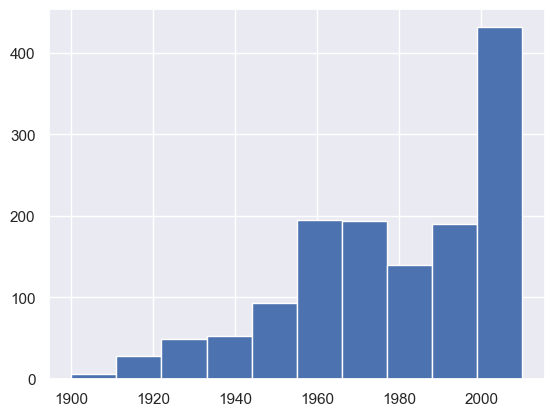

In [73]:
#LET'S DECIDE WHAT TO DO WITH COLUMNS WITH MISSING VALUES
plt.hist(numeric_features_data["GarageYrBlt"])

In [74]:

numeric_features_data["GarageYrBlt"].corr(numeric_features_data["YearBuilt"])
#very high correlation, remove GarageYrBlt

0.8256674841743421

LotFrontage

WHAT CAN WE DO

1. Use mean LotFrontage of the neighbourhood

2. Use mean LotFrontage of entire set

3. Simply fill all missing values with zero

Or predict with some model, that we will not do


In [75]:
numeric_features_data[numeric_features_data["LotFrontage"].isnull()]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009
12,20,NaN,12968,5,6,1962,1962,0.0,737,0,175,912,912,0,0,912,1,0,1,0,2,1,4,0,1962.0,1,352,140,0,0,0,176,0,0,9,2008
14,20,NaN,10920,6,5,1960,1960,212.0,733,0,520,1253,1253,0,0,1253,1,0,1,1,2,1,5,1,1960.0,1,352,0,213,176,0,0,0,0,5,2008
16,20,NaN,11241,6,7,1970,1970,180.0,578,0,426,1004,1004,0,0,1004,1,0,1,0,2,1,5,1,1970.0,2,480,0,0,0,0,0,0,700,3,2010
24,20,NaN,8246,5,8,1968,2001,0.0,188,668,204,1060,1060,0,0,1060,1,0,1,0,3,1,6,1,1968.0,1,270,406,90,0,0,0,0,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,20,NaN,12546,6,7,1981,1981,310.0,678,0,762,1440,1440,0,0,1440,0,0,2,0,3,1,7,1,1981.0,2,467,0,0,99,0,0,0,0,4,2007
1431,120,NaN,4928,6,6,1976,1976,0.0,958,0,0,958,958,0,0,958,0,0,2,0,2,1,5,0,1976.0,2,440,0,60,0,0,0,0,0,10,2009
1441,120,NaN,4426,6,5,2004,2004,147.0,697,0,151,848,848,0,0,848,1,0,1,0,1,1,3,1,2004.0,2,420,149,0,0,0,0,0,0,5,2008
1443,30,NaN,8854,6,6,1916,1950,0.0,0,0,952,952,952,0,0,952,0,0,1,0,2,1,4,1,1916.0,1,192,0,98,0,0,40,0,0,5,2009


In [76]:
substitude_value = numeric_features_data["LotFrontage"].mean()
substitude_value

70.04995836802665

In [77]:
numeric_features_data["LotFrontage"] = numeric_features_data["LotFrontage"].fillna(substitude_value)

In [78]:
numeric_features_data.MasVnrArea.fillna(numeric_features_data.MasVnrArea.median(),inplace=True) 

In [79]:
numeric_features_data.MasVnrArea.isnull().sum()

0

In [80]:
numeric_features_data.drop("GarageYrBlt", axis = 1, inplace = True)

In [81]:
numeric_features_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [82]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

vif = pd.DataFrame()
vif["features"] = numeric_features_data.columns
vif["vif_Factor"] = [variance_inflation_factor(numeric_features_data.values, i) for i in range(numeric_features_data.shape[1])]
np.set_printoptions(suppress=True)
vif

# We have some very correlated features, that is not gonna work well



/Users/tatiana/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_Factor
0,MSSubClass,4.640408e+00
1,LotFrontage,1.743278e+01
2,LotArea,2.644980e+00
3,OverallQual,6.652926e+01
4,OverallCond,4.083895e+01
5,YearBuilt,1.733179e+04
6,YearRemodAdd,2.073280e+04
7,MasVnrArea,1.841899e+00
8,BsmtFinSF1,inf
9,BsmtFinSF2,inf


Lets do something with categorical variables, some of them can be mapped into numeric, others can be transformed in dummy variables, and we can see which one are correlated with price

In [83]:
all_categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [84]:
for feature in all_categorical_features:
    print(feature + "\n")
    #print(raw_data[feature].unique()) 
    print(raw_data[feature].value_counts())

MSZoning

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street

Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley

Grvl    50
Pave    41
Name: Alley, dtype: int64
LotShape

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngt

There so many features
Lets choose basic ones:

SaleCondition
Normal     1
Other 0

MSZoning
Dummy

Utilities - good, but too little data

ExterCond

In [85]:
#lets transform all categorical into dummies
# than we will see which ones are highly correlated
# chose top and include in the model

# than we will try to use ridge and lasso regression to avoid multicolliniarity


In [86]:
raw_data["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [87]:
raw_data[all_categorical_features].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [88]:
missing_values_more_100 = raw_data[all_categorical_features].isnull().sum() > 100

In [89]:
a = missing_values_more_100[missing_values_more_100]

In [90]:
values_to_drop = list(a.index)

In [91]:
# drop the values with too many missing data
values_to_drop

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [92]:
categorical_features_in_model = ["MSZoning",
                                 "LotShape", 
                                 "Neighborhood",
                                 "ExterQual",
                                 "Foundation",
                                 "BsmtCond",
                                 "HeatingQC"]

In [93]:
categorical_data = raw_data[categorical_features_in_model]

In [94]:
categorical_data_with_dummies = pd.get_dummies(categorical_data)

In [95]:
categorical_data_with_dummies.shape

(1460, 53)

In [96]:
categorical_data_with_dummies.corrwith(y_target).sort_values()

ExterQual_TA           -0.589044
Foundation_CBlock      -0.343263
HeatingQC_TA           -0.312677
MSZoning_RM            -0.288065
LotShape_Reg           -0.267672
Foundation_BrkTil      -0.204117
Neighborhood_OldTown   -0.192189
Neighborhood_NAmes     -0.188513
Neighborhood_Edwards   -0.179949
Neighborhood_IDOTRR    -0.164056
Neighborhood_BrkSide   -0.143648
HeatingQC_Gd           -0.134722
HeatingQC_Fa           -0.133758
BsmtCond_Fa            -0.132739
Neighborhood_Sawyer    -0.128394
Foundation_Slab        -0.119740
ExterQual_Fa           -0.115149
Neighborhood_MeadowV   -0.112544
MSZoning_C (all)       -0.111257
Neighborhood_BrDale    -0.101303
MSZoning_RH            -0.065429
Neighborhood_SWISU     -0.063705
Neighborhood_Mitchel   -0.057845
BsmtCond_Po            -0.054529
Neighborhood_NPkVill   -0.037910
HeatingQC_Po           -0.030962
Neighborhood_Blueste   -0.020250
Foundation_Stone       -0.012103
Foundation_Wood         0.002711
Neighborhood_SawyerW    0.014560
Neighborho

In [97]:
numeric_features_data.shape


(1460, 35)

In [98]:
categorical_data_with_dummies.shape

(1460, 53)

In [99]:
all_data_features = pd.concat([numeric_features_data, categorical_data_with_dummies], axis = 1)

In [100]:
all_data_features.shape

(1460, 88)

In [101]:
all_data_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


### Building the model on new features

In [102]:
data_train, data_test, y_train, y_test = train_test_split(all_data_features, y_target, test_size=0.2)

In [103]:
reg = LinearRegression()
reg.fit(data_train, y_train)

LinearRegression()

In [104]:
reg.score(data_train, y_train)

0.8493979901567029

In [105]:
y_pred_test = reg.predict(data_test)

In [106]:
reg.score(data_test, y_test)

0.8857081132104233

In [107]:
a = np.log(y_test)
b = np.log(y_pred_test)
np.sqrt(mse(a,b))

0.1488185600599916

In [108]:
# Our predictions impoved, lets try to add regularization

In [109]:
reg = Ridge()
reg.fit(data_train, y_train)

Ridge()

In [110]:
reg.score(data_train, y_train)

0.8492290016871766

In [111]:
y_pred_test = reg.predict(data_test)

In [112]:
reg.score(data_test, y_test)

0.889440976050758

In [113]:
y_pred_test = reg.predict(data_test)
a = np.log(y_test)
b = np.log(y_pred_test)
np.sqrt(mse(a,b))

0.14764376749170677

### File for submission

In [114]:
data_test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [175]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [115]:
# We need to preprocess the dataset as we did with the training one

In [116]:
categorical_data_test = data_test[categorical_features_in_model]
categorical_data_test_with_dummies = pd.get_dummies(categorical_data_test)

In [125]:
numeric_features_names = numeric_features_data.columns

In [126]:
numeric_data_test = data_test[numeric_features_names]

In [127]:
numeric_data_test.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [128]:
numeric_data_test.shape

(1459, 35)

In [129]:
numeric_data_test.MasVnrArea.fillna(numeric_data_test.MasVnrArea.median(),inplace=True) 

/var/folders/gl/_tyc32gx42v6lvcrydtm5xyc0000gn/T/ipykernel_18835/176339489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data_test.MasVnrArea.fillna(numeric_data_test.MasVnrArea.median(),inplace=True)


In [131]:
numeric_data_test.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         0
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [156]:
#numeric_data_test.LotFrontage.fillna(numeric_data_test.LotFrontage.median(),inplace=True) 
numeric_data_test.BsmtFullBath.fillna(numeric_data_test.BsmtFullBath.median(),inplace=True) 
numeric_data_test.GarageCars.fillna(numeric_data_test.GarageCars.median(),inplace=True) 
numeric_data_test.GarageArea.fillna(numeric_data_test.GarageArea.median(),inplace=True)
numeric_data_test.BsmtFinSF1.fillna(numeric_data_test.BsmtFinSF1.median(),inplace=True)
numeric_data_test.BsmtFinSF2.fillna(numeric_data_test.BsmtFinSF2.median(),inplace=True)
numeric_data_test.BsmtUnfSF.fillna(numeric_data_test.BsmtUnfSF.median(),inplace=True)
numeric_data_test.TotalBsmtSF.fillna(numeric_data_test.TotalBsmtSF.median(),inplace=True)
numeric_data_test.BsmtHalfBath.fillna(numeric_data_test.BsmtHalfBath.median(),inplace=True)


/var/folders/gl/_tyc32gx42v6lvcrydtm5xyc0000gn/T/ipykernel_18835/2102811594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data_test.BsmtFullBath.fillna(numeric_data_test.BsmtFullBath.median(),inplace=True)
/var/folders/gl/_tyc32gx42v6lvcrydtm5xyc0000gn/T/ipykernel_18835/2102811594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data_test.GarageCars.fillna(numeric_data_test.GarageCars.median(),inplace=True)
/var/folders/gl/_tyc32gx42v6lvcrydtm5xyc0000gn/T/ipykernel_18835/2102811594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

In [157]:
numeric_data_test.isnull().sum()


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [158]:
substitude_value  =  numeric_features_data["LotFrontage"].mean()
numeric_data_test["LotFrontage"] = numeric_data_test["LotFrontage"].fillna(substitude_value)
substitude_value

/var/folders/gl/_tyc32gx42v6lvcrydtm5xyc0000gn/T/ipykernel_18835/3118861040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data_test["LotFrontage"] = numeric_data_test["LotFrontage"].fillna(substitude_value)


70.04995836802642

In [123]:
# We got rid of null values

In [159]:
all_data_features_test = pd.concat([numeric_data_test, categorical_data_test_with_dummies], axis = 1)

In [160]:
numeric_data_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1.0,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,2.0,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,0,700,7,2006


In [161]:
all_data_features_test


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,3,2010,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,0,0,0,6,2010,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,0,144,0,0,1,2010,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,2.0,576.0,474,0,0,0,0,0,0,9,2006,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [162]:
predicted_values = reg.predict(all_data_features_test)

In [178]:
data_predicted = pd.DataFrame({"Id": data_test.Id,"SalePrice": predicted_values})

In [179]:
data_predicted.head()

,Id,SalePrice
0,1461,109567.063257
1,1462,152997.380164
2,1463,170719.281866
3,1464,192954.359140
4,1465,238909.618823


In [181]:
data_predicted.to_csv("prediction_1.csv", index = False)